[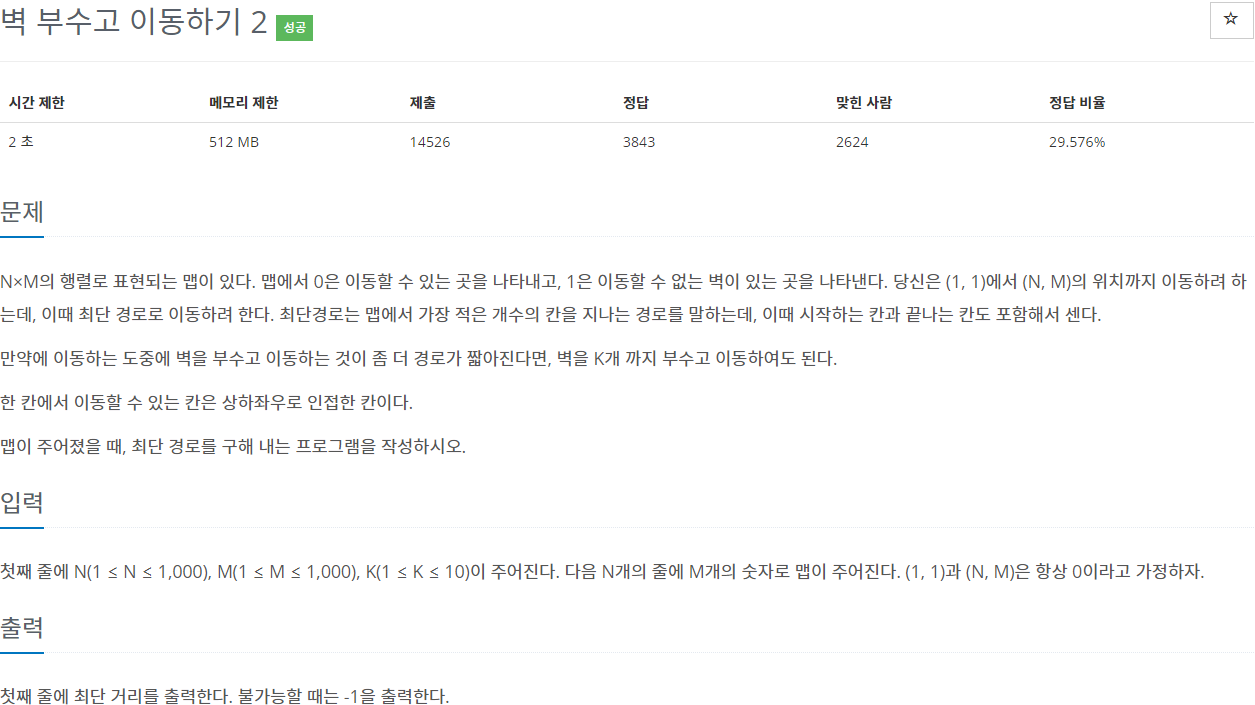](https://www.acmicpc.net/problem/14442)

In [ ]:
from collections import deque
import sys
input = sys.stdin.readline


def bfs(power):
    q = deque()
    q.append((0, 0, power))
    visited[0][0][power] = 1
    while q:
        i, j, power = q.popleft()
        if (i, j) == (n - 1, m - 1):
            return visited[i][j][power]
        for di, dj in [[0, 1], [1, 0], [-1, 0], [0, -1]]:
            ni, nj = i + di, j + dj
            if ni < 0 or nj < 0 or ni >= n or nj >= m:
                continue
            # 벽이 아니고 방문한 적 없을때
            if not arr[ni][nj] and not visited[ni][nj][power]:
                visited[ni][nj][power] = visited[i][j][power] + 1
                q.append((ni, nj, power))
            # 벽을 만났고 부술 수 있는 power 가 있을때
            if arr[ni][nj] == 1 and power > 0 and not visited[ni][nj][power - 1]:
                visited[ni][nj][power - 1] = visited[i][j][power] + 1
                q.append((ni, nj, power - 1))
    return -1


n, m, k = map(int, input().split())
arr = [list(map(int, input().rstrip())) for _ in range(n)]
visited = [[[0] * (k + 1) for _ in range(m)] for _ in range(n)]     # 벽을 부순 여부에 따라 visited 다르게 방문
print(f'{bfs(k)}')

---

버전 1과 다르게 power 가 10 이하의 수로 주어짐.<br>
그리고 극한의 시간관리 들어가야 함, 
1. input 을 sys를 이용해 받아야 하고
2. ni, nj 범위를 처음에 고려하여 continue 처리 해야하고
3. deque는 기본